# k-nearest neighbor (KNN)

In [1]:
# get methods from py-file in other directory
from modules.data_exploration.data_ex import import_data, gen_bulk_data, get_bulk_inst
from modules.build_ml_models.KNN_classification import KNN_classification


In [2]:
file_path = 'data/churn.csv'
data = import_data(file_path)
display(data)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,50,408,2000,0,1,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,49,152,415,394,0,0,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,7,61,415,313,0,0,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,7,109,510,3471,0,0,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0


## Get data

In [3]:
data_dict = gen_bulk_data(file_path)

In [4]:
data_dict.keys()

dict_keys(['original', 'dropped', 'scaled', 'encoded', 'encoded and scaled', 'scaled and dropped'])

## Prediction with *original* data

In [5]:
key = 'original'

x_train, x_test, x_val, y_train, y_test, y_val = get_bulk_inst(data_dict, key)



In [6]:
print(x_train.shape)
x_train

(3500, 20)


,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,42,108,510,1557,0,1,34,162.1,83,27.56,171.8,117,14.60,259.8,76,11.69,9.6,3,2.59,4
1,17,80,415,136,0,0,0,220.0,114,37.40,207.7,76,17.65,168.4,137,7.58,12.1,3,3.27,2
2,16,137,415,88,0,1,19,175.3,96,29.80,241.3,146,20.51,211.4,109,9.51,7.8,2,2.11,0
3,30,141,415,3918,0,1,32,322.4,92,54.81,283.2,107,24.07,209.5,111,9.43,6.7,3,1.81,1
4,35,63,415,4364,1,1,36,199.0,110,33.83,291.3,111,24.76,197.6,92,8.89,11.0,6,2.97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,44,121,415,517,0,1,41,215.5,95,36.64,241.8,92,20.55,147.0,108,6.61,9.6,3,2.59,1
3496,24,101,415,4769,1,0,0,133.5,51,22.70,219.6,96,18.67,210.0,74,9.45,11.7,4,3.16,1
3497,36,154,415,2450,1,0,0,145.9,69,24.80,208.2,141,17.70,180.9,106,8.14,14.4,10,3.89,0
3498,46,81,415,4393,1,1,32,229.0,80,38.93,221.0,113,18.79,291.4,91,13.11,12.4,5,3.35,1


In [7]:
print(x_test.shape)
x_test

(750, 20)


,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,31,162,408,2111,0,0,0,217.6,87,36.99,279.0,71,23.72,250.7,65,11.28,10.4,4,2.81,2
1,14,52,510,966,0,0,0,207.1,86,35.21,162.0,98,13.77,243.0,102,10.93,6.0,1,1.62,1
2,13,82,510,4110,0,1,34,232.6,121,39.54,153.2,115,13.02,286.7,77,12.90,4.7,3,1.27,3
3,21,73,408,1096,0,0,0,272.4,112,46.31,252.2,91,21.44,255.4,112,11.49,10.9,5,2.94,1
4,36,71,415,615,0,0,0,123.8,130,21.05,226.5,91,19.25,213.9,96,9.63,8.8,7,2.38,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,29,132,510,403,0,0,0,99.5,110,16.92,129.1,80,10.97,125.1,124,5.63,9.7,3,2.62,0
746,8,114,415,1036,0,1,31,222.8,98,37.88,180.5,105,15.34,151.3,101,6.81,13.0,4,3.51,0
747,11,33,415,4992,0,0,0,200.5,117,34.09,159.9,111,13.59,196.2,84,8.83,16.3,6,4.40,3
748,38,82,415,303,0,1,24,155.2,131,26.38,244.5,106,20.78,122.4,68,5.51,10.7,3,2.89,1


In [8]:
y_train

0       1
1       0
2       0
3       1
4       0
       ..
3495    0
3496    0
3497    1
3498    0
3499    0
Name: class, Length: 3500, dtype: int64

In [9]:
my_classification = KNN_classification()

KNN Classification created


In [10]:
print(my_classification.KNNmodel)

KNeighborsClassifier()


In [11]:
my_classification.set_train(x_train, y_train)
my_classification.set_test(x_test, y_test)
my_classification.fit()
my_classification.predict()


In [12]:
print(my_classification.get_test_accuracy())

0.8613333333333333


In [13]:
print(my_classification.get_cross_validation_accuracy())

0.8577142857142857


Square-root of number of datasets: 59
Best Score: 0.8620000000000001
Best k: 10
Best Weights: distance


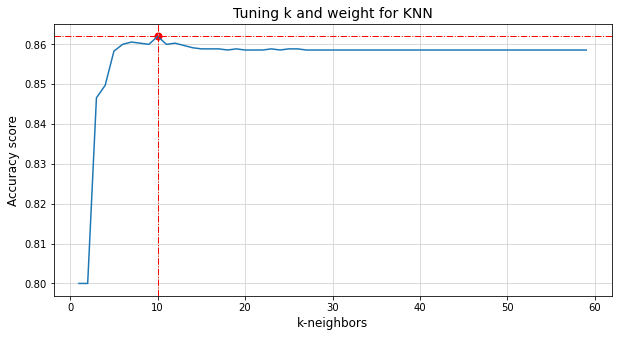

0.8653333333333333


In [14]:
my_classification.tune_parameters()
my_classification.print_tuning_results()
my_classification.plot_tuning_k_results()
print(my_classification.get_test_accuracy())

Predicted,no churn,churn
Actual,,
no churn,643,1
churn,100,6


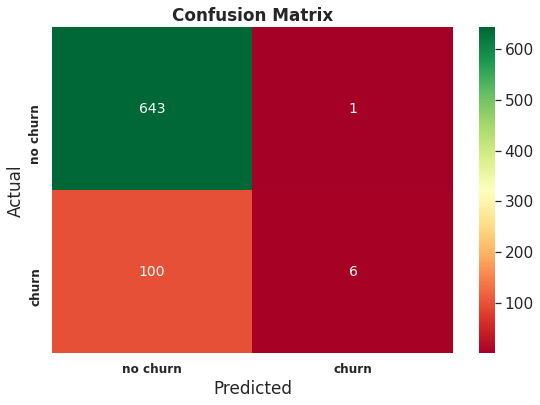


Classification report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       644
           1       0.86      0.06      0.11       106

    accuracy                           0.87       750
   macro avg       0.86      0.53      0.52       750
weighted avg       0.86      0.87      0.81       750



In [15]:
my_classification.plot_confusion_matrix(normalize=None)

The KNN predicts most of the time "no churn" an the accuracy corresponds to the occurance of "no churn in the data. For no churn the result is impressive but for churn there is no real benefit since approx 90% of the churn is not detected. 
So KNN can be seen more as a contant output than a real prediction but a kind of constant output

## Prediction with *scaled* data

In [26]:
key = 'scaled'
x_train, x_test, x_val, y_train, y_test, y_val = get_bulk_inst(data_dict, key)


In [27]:
#x_train.drop(columns=['index'], inplace=True)
x_train

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_customer_service_calls,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge
0,42,108,510,1557,0,1,4,1.952171,-0.335287,-0.847281,-0.335023,-0.537982,0.858743,-0.538729,1.177721,-1.200200,1.177207,-0.231590,-0.594380,-0.235064
1,17,80,415,136,0,0,2,-0.565558,0.741367,0.709245,0.741307,0.170590,-1.211126,0.169501,-0.621395,1.886058,-0.620564,0.672535,-0.594380,0.675875
2,16,137,415,88,0,1,0,0.841408,-0.089832,-0.194544,-0.090005,0.833767,2.322797,0.833611,0.225016,0.469415,0.223645,-0.882560,-0.992530,-0.878081
3,30,141,415,3918,0,1,1,1.804070,2.645501,-0.395386,2.645666,1.660765,0.353897,1.660266,0.187616,0.570604,0.188652,-1.280375,-0.594380,-1.279966
4,35,63,415,4364,1,1,1,2.100273,0.350871,0.508403,0.350809,1.820638,0.555836,1.820489,-0.046623,-0.390690,-0.047552,0.274720,0.600068,0.273990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,44,121,415,517,0,1,1,2.470527,0.657689,-0.244755,0.658176,0.843636,-0.403372,0.842899,-1.042632,0.418820,-1.044856,-0.231590,-0.594380,-0.235064
3496,24,101,415,4769,1,0,1,-0.565558,-0.867106,-2.454017,-0.866625,0.405466,-0.201434,0.406351,0.197458,-1.301389,0.197400,0.527875,-0.196231,0.528517
3497,36,154,415,2450,1,0,0,-0.565558,-0.636527,-1.550228,-0.636920,0.180459,2.070374,0.181111,-0.375345,0.317632,-0.375612,1.504330,2.192666,1.506437
3498,46,81,415,4393,1,1,1,1.804070,0.908722,-0.997912,0.908663,0.433098,0.656805,0.434216,1.799735,-0.441284,1.798335,0.781030,0.201919,0.783044


In [28]:
y_train

0       1
1       0
2       0
3       1
4       0
       ..
3495    0
3496    0
3497    1
3498    0
3499    0
Name: class, Length: 3500, dtype: int64

In [29]:
my_classification = KNN_classification()

KNN Classification created


In [30]:
print(my_classification.KNNmodel)

KNeighborsClassifier()


In [31]:
my_classification.set_train(x_train, y_train)
my_classification.set_test(x_test, y_test)
my_classification.fit()
my_classification.predict()


In [32]:
print(my_classification.get_test_accuracy())

0.848


In [33]:
print(my_classification.get_cross_validation_accuracy())

0.8382857142857143


Square-root of number of datasets: 59
Best Score: 0.8585714285714285
Best k: 16
Best Weights: uniform


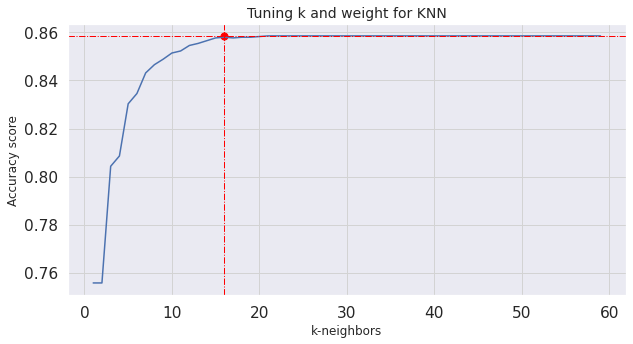

0.8586666666666667


In [34]:
my_classification.tune_parameters()
my_classification.print_tuning_results()
my_classification.plot_tuning_k_results()
print(my_classification.get_test_accuracy())

Predicted,no churn,churn
Actual,,
no churn,644,0
churn,106,0


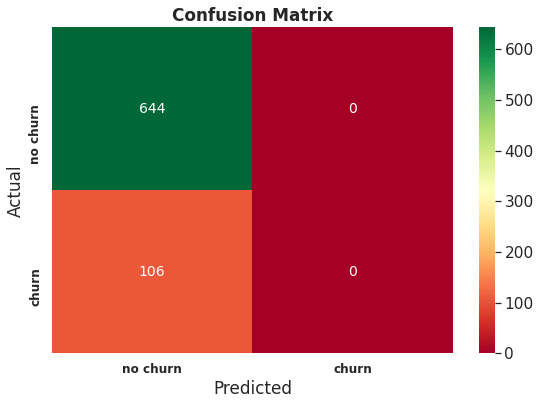


Classification report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       644
           1       0.00      0.00      0.00       106

    accuracy                           0.86       750
   macro avg       0.43      0.50      0.46       750
weighted avg       0.74      0.86      0.79       750



/home/tobias/anaconda3/envs/tobias/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
my_classification.plot_confusion_matrix(normalize=None)

Predicted,no churn,churn
Actual,,
no churn,1.0,0.0
churn,1.0,0.0


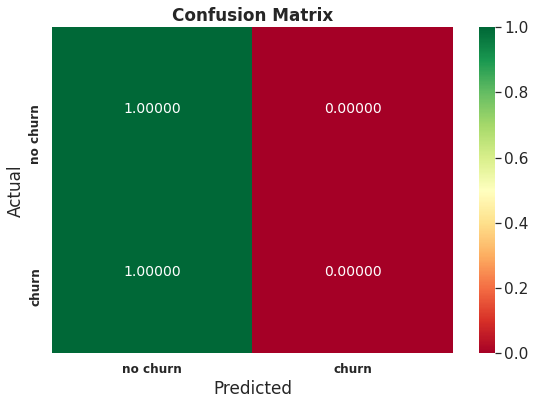


Classification report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       644
           1       0.00      0.00      0.00       106

    accuracy                           0.86       750
   macro avg       0.43      0.50      0.46       750
weighted avg       0.74      0.86      0.79       750



/home/tobias/anaconda3/envs/tobias/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
my_classification.plot_confusion_matrix(normalize='true')